Дерево решений — метод анализа больших массивов данных. Решающее дерево предсказывает значение целевой переменной с помощью применения последовательности простых решающих правил (которые называются предикатами). Друими словами Дерево решений представляет собой иерархическую древовидную структуру, состоящую из правила вида «if <>, then <>». Правила генерируются автоматически по  обучающему множеству (выборке) правила генерируются автоматически в процессе обучения.

Часто в обучающем множестве для примеров должно быть задано целевое значение, тогда деревья решений — являются моделями на основе обучения с учителем. По типу переменной выделяют два типа деревьев с учителем:
* дерево классификации — когда целевая переменная дискретная;
* дерево регрессии — когда целевая переменная непрерывная.

Отметим, что также есть примеры решения задач без учителя с использованием деревьев. 

Прежде, чем расмматрвать дерево решений для машинного обучения, рассмотрим пример реализации логической функции при помощи дерева:

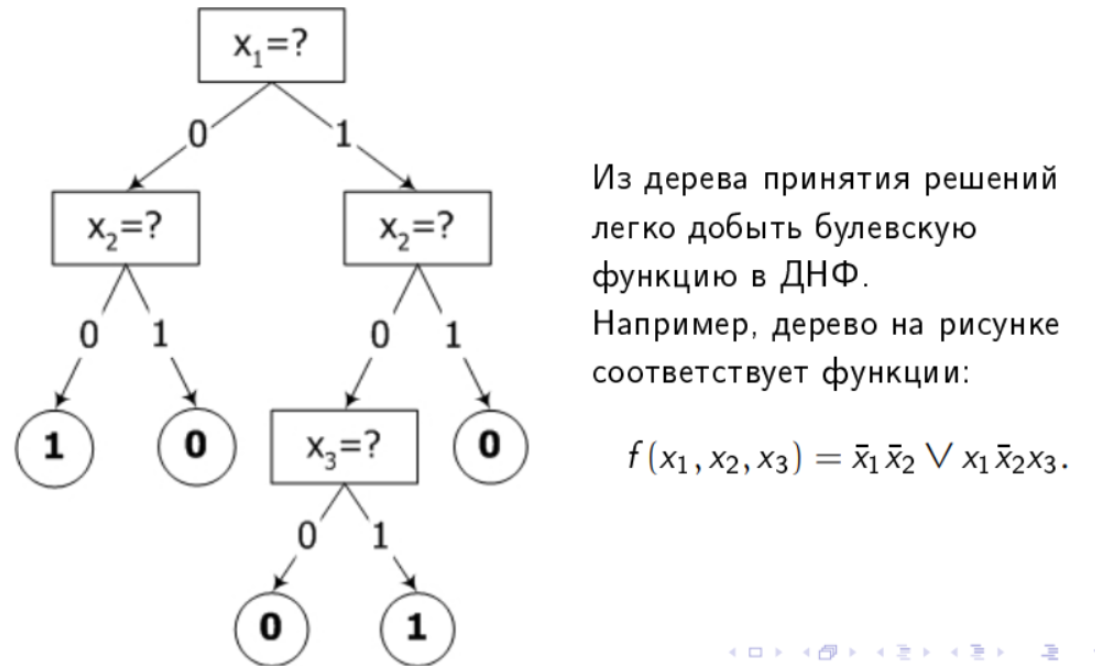


Также важно отметить, что часто деревья используются для решения задча для категориальных данных, то есть таких, которые могут быть записаны в таблице

<!-- https://habr.com/ru/company/productstar/blog/523044/ -->



На практике мы будем работать с деревьями в несколько другом ключе. Допустим, что у нас есть таблица, в которой есть колонки - это атрибуты или признаки и строки - это записи. Теперь допустим, что часть колонок это входные данные, а одна из колонок выходные. Например так, как это показано ниже 

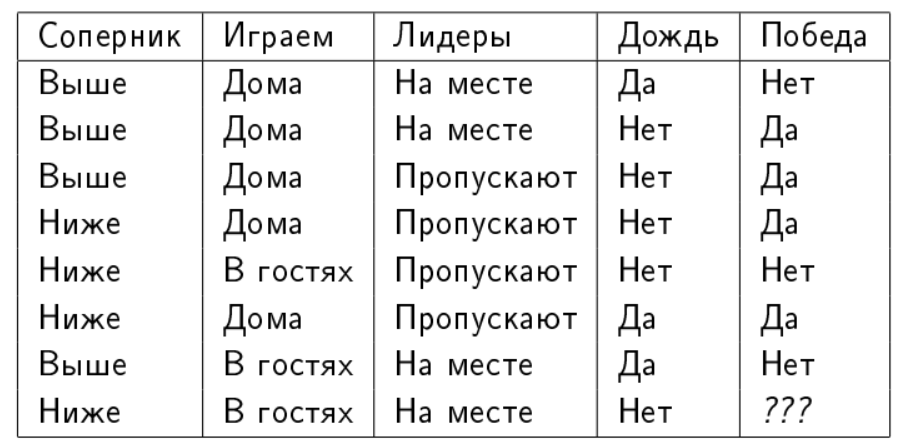

<!-- https://logic.pdmi.ras.ru/~sergey/teaching/mlcsclub/02-dectrees.pdf -->

В данном примере последня колонка это ответа, остальные - это входные значения. 

Тогда наша задача предсказать значение из оставшейся колонки по тем значениям, которые уже есть.

По тем данным, которые у нас есть мы должны построить ряд правил, которые будут давать ответ (предсказание) с наибольшей вероятностью. 
Например, предположим, что самое важное правило, это то где соперник в таблице (ниже или выше). Далее посмотрим, что будет в первом и во втором случаях. Допустим, что если выше, то достаточно только сказать где будет матч, если в гостях, то проигрыш, елси дома, то выигрыш. Также допустим, что во втором случае ответ требует больше правил, тогда в этой ситуации проведем еще несколько расщиплений признаков.

Когда у нас есть дерево, построенное по имеющимся данным (тренеровочной выборке), то далее, получив новую записть можно очень просто предсказать ответ целевой колнки, спускаясь по дереву. Пример показан ниже. 

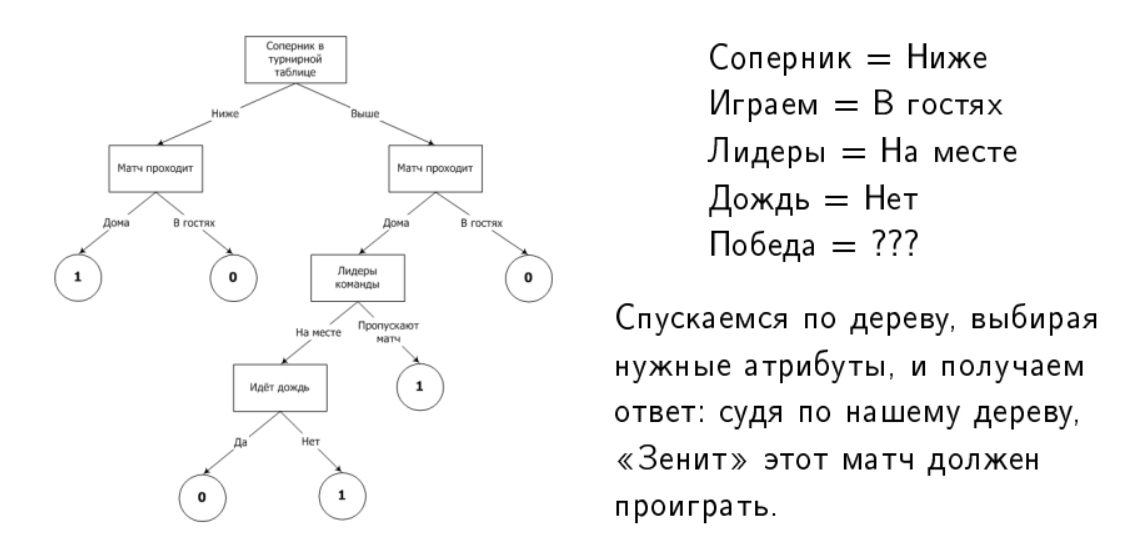

Другой пример использования дерева решений связан со следующей задачей.

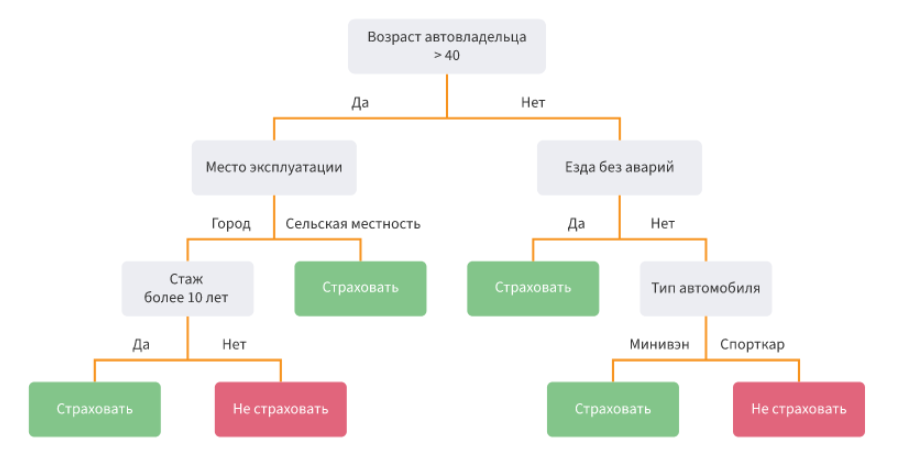

<!-- https://loginom.ru/blog/decision-tree-p1 -->

Процесс построения деревьев решений заключается в последовательном, рекурсивном разбиении обучающего множества на подмножества с применением решающих правил в узлах. Процесс разбиения продолжается до тех пор, пока все узлы в конце всех ветвей не будут объявлены листьями. Объявление узла листом может произойти естественным образом (когда он будет содержать единственный объект, или объекты только одного класса), или по достижении некоторого условия остановки, задаваемого пользователем (например, минимально допустимое число примеров в узле или максимальная глубина дерева).

Алгоритмы построения деревьев решений относят к категории так называемых жадных алгоритмов. Жадными называются алгоритмы, которые допускают, что локально-оптимальные решения на каждом шаге (разбиения в узлах), приводят к оптимальному итоговому решению. В случае деревьев решений это означает, что если один раз был выбран атрибут, и по нему было произведено разбиение на подмножества, то алгоритм не может вернуться назад и выбрать другой атрибут, который дал бы лучшее итоговое разбиение. Поэтому на этапе построения нельзя сказать обеспечит ли выбранный атрибут, в конечном итоге, оптимальное разбиение.

По существу, метод построения деревьев сводится к тому, что для выборки (множества) $X$, которая содержит число классов $k$; число признаков (атрибутов) $M$ и число записей $N$ итеративно производится ряд разбитений  на подмножества, которые так или иначе ассоциированны с классами. Для этого выбирается один из признаков  $A_j$, который в свою очередь содержит два и более уникальных значения $(a_1,a_2,...,a_p)$, где p — число уникальных значений признака. Затем множество $S $ разбивается на два или несколько подмножеств, каждое из которых включает примеры, содержащие соответствующее значения атрибутов. Это процедура будет рекурсивно повторяться до тех пор, пока все примеры в результирующих подмножествах не окажутся одного класса.

На практике у нас имеются таблицы, в которых достаточно много записей и много колонок, которые к тому же сложно интерпретировать, например, число вариантов значения признака может измеряться десятками или вообще представлять непрерывный диапазон значений.  В этом случае работа с деревьями так, как было показано в примерах до этого будет достаточно сложной. Нам потребуются более развитые методы выбора признаков и диапазонов их значений, соответствующих тем или иным результатам. 

Введем некоторые дедуктивные предположения, например, самый значимый параметр - это тот, для которого зависимость соответствующего столбца и столбца результатов будут иметь наибольший разброс. Или, например, предположим, что разброс результатов целевого столбца действительно описывается остальными результатами. Тогда скажем, что самый значимый параметр - это такой, для которого если все значения будут одинаковыми, то результат тоже будет почти всегда один и тот-же, то есть остальные столбца будут не так сильно влиять на результат. Другими словами, разброс в соответствующем столбце будет наиболее влиять на разброс результатов.

Теперь возникает вопрос, как оценить разброс. Можно выбрать множество подходов к решению этого вопроса. Однако для категориальных данных часто выбираются показатели, связанные с некоторыми численными оценками информативности. Одним из таких показателей является энтропия. 

В самом простом случае можно определить энтропию следующим образом, допустим, что есть столбец X, состоящий из N записей, среди которых $N_0$ записей соответствуют значению $X_0$ (например "Да"), а остальные нет (то есть будут соответствовать значению $X_1$ (например, "Нет"), тогда энтропию столбца X можно определить, как 
$$ H(X) = -\frac{N_0}{N}\log_2 \frac{N_0}{N} - \frac{N-N_0}{N}\log_2 \frac{N-M}{N}$$
другими словами мы складываем функцию числа появлений значений  $X_0$, с числом отсуствия появлений значения $X_0$ в наших данных, например в последнем столбце (в результате). Для него значение $H(\text{Победа},\text{да}) = -\frac{4}{7}-\frac{3}{7}.$ 

Если число отдельных значений $X_0$ больше чем два, то энтропию следует записать как
$$ H(X) = -\sum_{k=0}^{K-1}\frac{N_k}{N}\log_2 \frac{N_k}{N},$$
где $M_k$ - число появлений значения $X_k$. Отметим, что в данном случае (подсчет числа повторений) видна связь значений энтропии и распределения значений $X_k$. Напомним, что распределение — это зависимость числа повторений значений $Y_k$ (то есть $M_k$) для каждого значения (или диапазона значений $Y_k$).

Другими словами можно сказать, что величина $\frac{N_k}{N}$ - это вероятность наступления собыитя $Y_k$, можем обозначить ее как $p_k = \frac{N_k}{N}$. 

Ниже приведен пример расчета энтропии от значения вероятности для бинарного случая
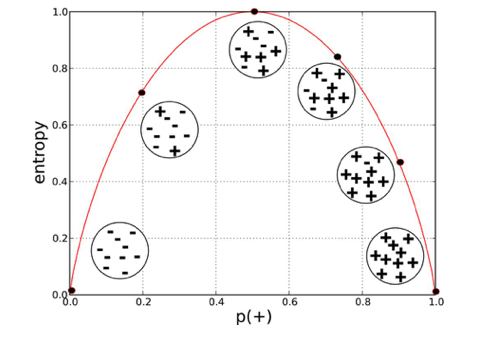!

<!-- https://habr.com/ru/company/otus/blog/502200/ -->

Можно выделить несколько видов того, какой может быть  энтропия. Приведенный выше вид будет называться собственной энотропией. В общем случае она может быть записана как $H(X) = -\sum_{k=0}^{K-1}p_k$. Помимо полной энтропии можно записать условную энтропию, она может быть выражена как $H(X|c) = -\sum_{k\in c}p_k$, где $c$ - это некоторое условие, например, условие, что мы считаем энтропию столбца победа только для тех случаев, когда игры дома; $\sum_{k\in c}$ - это условно сумма значений только для тех случаев, когда выполняется наше условие. Отметим, что условие не обязательно может быть равенством, можно поставить и условие в виде неравенства или условие отрицание равенста.

Следующий вопрос, это то как посчитать значения, которые будут соответствовать нашему дедуктивному предположению. Такое предположение называется приростом энтропии или приростом инфомации, если интерпретировать энтропию как меру информативности. В самом простом случае можно предположить, что  у нас есть некоторое правило Q, по которому мы можем отобрать значения столбца X. Например таким правилом может стать значение столбца "статус соперника" из таблицы выше. Тогда для каждого статуса соперника записать прирост энтропии следующим образом:

$$ G(X|Q) = H(X)-H(X|Q)= H(X) - \sum_{q\in Q}\frac{N_q}{N}H(X_i|q),$$
где $H(X|Q)$ - это энтропия для частных случаев данных, которые соответствуют какому либо правилу; а выражение $\sum_{k\in Q}\frac{N_Q}{N}H(X_i|q)$ - это сумма энтропий для соответствующих частных случаев. Для более подробного разъяснения данного выражения можно привести пример 

Ниже показан пример расчета:
$$ G(\text{победа}|\text{соперник}) = H(\text{победа}) - \frac{4}{7}H(\text{победа}|\text{выше}) - \frac{3}{7}H(\text{победа}|\text{ниже})$$

Если наше условие будет иметь более двух возможных значений, тогда результат прироста информации будет иметь разные значения в зависимости от выбора значения для разбиений. Таким образом для одного столбца (признака) можно получить несколько возможных значений прироста информации. Однако, наше дерево как правило бинарно,

<!-- Если что подробный вывод понятия энтропия можно найти тут https://habr.com/ru/post/171759/ -->

<!-- https://neerc.ifmo.ru/wiki/index.php?title=%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B8_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9_%D0%BB%D0%B5%D1%81 -->
 

Теперь рассмотрим общий принцип разбиения дерева. 

Пусть задано бинарное дерево, в котором:
* Каждой внутренней вершине $v$ (каждому расщиплению) приписан предикат (решающее правило, как правило бинарный) $B_v:X→{0,1}$.
* Каждой листовой вершине $v$ (той, от которой нет расщиплений) приписан прогноз $\hat y_v\in Y$, где $Y$ — область значений целевой переменной.
* В ходе предсказания осуществляется проход по нашему дереву от корня  (начала дерева) к какому-либо листу (результату). 
* В очередной внутренней вершине $v$ проход продолжится вправо, если $B_v(x)=1$, и влево, если $B_v(x)=0$. 
* Проход продолжается до момента, пока не будет достигнут некоторый лист, тогда ответом алгоритма на объекте $x$ считается прогноз $c_v$, приписанный этому листу.

Отметим, что в общем случае предикат может быть любым, но на практике, как правило, выбирают такие, что $B_v(x_j,t)=[x_j\leq t]$

При проходе через узел дерева с данным предикатом объекты будут отправлены в правое поддерево, если значение $j$-го признака у них меньше либо равно $t$, и в левое — если больше. В дальнейшем рассказе мы будем по умолчанию использовать именно такие предикаты.

<!-- https://ml-handbook.ru/chapters/decision_tree/intro -->

Рассмотрим набор данных авторынка Молдавии. 

Для начала посмотрим на исключительно категориальные колонки. 

Напомним, что среди приведенных колонка "Transmission" является целевой для задачи классификации. То есть, задача состоит в предсказании типа трансмиссии по параметрам автомобиля.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns; sns.set()
import os

In [3]:
df = pd.read_csv("car_se.csv")
df = df.drop(columns = ['Unnamed: 0'])

name_colums = df.columns
df.tail()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),km_year
32069,53,88,2016,10,88000.0,1800.0,4,1,11500.0,14666.666667
32070,27,53,2002,3,225000.0,1800.0,3,0,4400.0,11250.000000
32071,12,77,2015,11,89000.0,1500.0,0,0,7000.0,12714.285714
32072,31,10,2006,1,370000.0,2000.0,0,0,4000.0,23125.000000
32073,41,62,2006,6,300000.0,1500.0,0,0,4000.0,18750.000000


Для начала рассмотрим категориальные данные. <br>
Попробуем посчитать энтропию по целевому столбцу. <br>
Для этого давайте посчитаем число значений для каждой категории. 
<!-- https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/ -->

In [11]:
y = df['Transmission'].values
count = np.array([np.sum(y == lable) for lable in np.unique(y)])
count

array([17395, 14679])

Теперь посчитаем вероятность появления каждого значения

In [5]:
p = count/y.size
p

array([0.54233959, 0.45766041])

In [12]:
def entropy(y):
    p = np.array([np.sum(y == lable) for lable in np.unique(y)])/y.size
    return - np.sum(p*np.log2(p))

entropy(y)

0.9948213324705565

Теперь поробуем посчитать энтропию по целевому столбцу только в тех случаях, когда выполняется некоторое наше условие. 

Для начала запишем функцию, которя будет разделять данные по нашему условию.

In [35]:
def split(x, feature, threshold):
    idx_r = np.where(X[:,feature] >=threshold)[0]
    idx_l = np.where(X[:,feature] < threshold)[0]
    return x[idx_r,:], x[idx_l,:]


В качестве теста выбирем условие, например, что тип топлива только 4,5. В данном случае мы делаем наше расщипление в не зависимости от того, как мы интерпретируем данные типы топлива. Мы можем интерпретировать их как бензин и дизель или как-то еще, для нас сейчас это не важно. Однако, давайте проверим, сколько записей будет слева и справа

In [36]:
df['Fuel_type'].value_counts()


0    15224
4    11084
3     3463
2     1836
5      438
1       29
Name: Fuel_type, dtype: int64

In [37]:
X_l,X_r  = split(df.values, 6, 3)

df_test = pd.DataFrame(X_r, columns=df.columns)
df_test['Fuel_type'].value_counts()

0.0    15224
2.0     1836
1.0       29
Name: Fuel_type, dtype: int64

In [321]:
X,y = df.drop(columns = ['Transmission']).values,df['Transmission'].values

Теперь мы можем посчитать функцию оценки изменения информации. 

Для расчсета функции будем использовать два массива - X и y по отдельности. Однако, расщипление будем проводить по обоим массивам всместе, так как это необходимо для последущих вычислений энортопии.

In [322]:
def info_gain(X,y,feature, threshold):
    Xy = np.column_stack((X,y))
    Xy_l,Xy_r  = split(Xy, feature, threshold)
    y_l = Xy_l[:,-1]
    y_r = Xy_r[:,-1]
    return entropy(y) - y_l.size/y.size * entropy(y_l) - y_r.size/y.size * entropy(y_r)

info_gain(X,y,6,3)

0.0021400303395707754

На самом деле нам будет более интересно найти такое расщипление среди всех возможных, чтобы прирост информации был максимален. В этом и заключается принцип жадного поиска.

Посмотрим, к чему это приведет. Для начала рассмортим процедуру для отдельного признака. Отметим, что фактически такая постановка проблемы эквивалентна поиску лучшего порога для признака. 
после перейдем к поиску среди всех признаков.


In [325]:
def split_xy(X,y,feature, threshold):
    Xy_l,Xy_r  = split(np.column_stack((X,y)), feature, threshold)
    y_l = Xy_l[:,-1]
    y_r = Xy_r[:,-1]
    return Xy_l[:,:-1], y_l, Xy_r[:,:-1], y_r

def info_gain(X,y,feature, threshold):
    _,y_l,_,y_r = split_xy(X,y,feature, threshold)
    info_gain = entropy(y) - y_l.size/y.size * entropy(y_l) - y_r.size/y.size * entropy(y_r)
    return info_gain

def best_split(X,y):
    samples, features = X.shape
    max_gain = 0
    best_threshold = 0 
    best_feature   = 0
    for feature in range(features):
        values = set(X[:,feature])
        for threshold in values:
            g = info_gain(X,y,feature, threshold)
            if g>max_gain:
                max_gain = g
                best_threshold = threshold
                best_feature   = feature
             
    return best_threshold, best_feature, max_gain

best_threshold, best_feature, max_gain= best_split(X,y)


In [326]:
best_threshold, best_feature, max_gain

(8501.0, 7, 0.23055642085917194)

попробуем переписать процедуры так, чтобы работали быстрее

In [358]:
def entropy(y):
    values,counts = np.unique(y, return_counts=True)
    p = counts/y.size
    return - np.sum(p*np.log2(p))

def info_gain(y,y_l,y_r):
    return - y_l.size/y.size * entropy(y_l) - y_r.size/y.size * entropy(y_r)

In [363]:
def best_threshold(X,y, feature):
    
    values, counts = np.unique(X[:,feature], return_counts=True)
    
    idx_feature = np.argsort(X[:,feature])
    
    y_sort = y[idx_feature]
      
    idxs = np.cumsum(counts)
    
    g = [info_gain(y,y_sort[:idx],y_sort[idx:]) for  idx in idxs ]
    
    idx_max_gain = np.argmax(g)
    
    return values[idx_max_gain],  g[idx_max_gain]


def best_split(X,y):
    features = X.shape[1]
    
    gains = np.zeros(features)
    thresholds = np.zeros(features)
    
    for feature_i in range(features):
        thresholds[feature_i],gains[feature_i] = best_threshold(X,y,feature_i)
        
    best_feature = np.argmax(gains)
    
    return best_feature, thresholds[best_feature], entropy(y)+ gains[best_feature]

def split_xy(X,y,feature, threshold):
    Xy_l,Xy_r  = split(np.column_stack((X,y)), feature, threshold)
    y_l = Xy_l[:,-1]
    y_r = Xy_r[:,-1]
    return Xy_l[:,:-1], y_l, Xy_r[:,:-1], y_r    

In [367]:
%%time
best_threshold(X,y, 7)

CPU times: user 512 ms, sys: 3.25 ms, total: 516 ms
Wall time: 512 ms


(8500.0, -0.7642649116113844)

In [368]:
%%time
best_split(X,y)

CPU times: user 6.47 s, sys: 20.2 ms, total: 6.49 s
Wall time: 6.49 s


(7, 8500.0, 0.23055642085917205)

После проведения каждого расщипления важно проверить, нужно ли еще. Для такой проверки можно привести несколько критерив. Наиболее простыми из которых может быть следующие:
1. если глубина дерева больше заданной;
2. если в образованном листе остался только один элемент (или меньше, чем заданное количество элементов);
3. если в образованном листе остались элементы одного класса;
4. если прирост информации не изменился посравнению с предыдущим листом.

Для реализации данных критериев запишим функцию

In [369]:
__TOL__ = 1e-5
def stop_criteria(y,depth, gain = 0, max_depth=100, min_samples = 1, gain_tolerance = __TOL__):
    if y.size<=min_samples:
        return True
    elif depth>max_depth:
        return True
    elif gain <gain_tolerance:
        return True
    elif len(set(y))==1:
        return True
    else:
        return False

In [373]:
data = {'feature':None, 
        'threshold':None,
        'stop':None,
        'depth':None,
        'position':None,
        'gain': None,
        'decision':None}

tree = {'data':None,
        'left':None,
        'right':None}

In [483]:
class Node:
    def __init__(self):
        
        # links to the left and right child nodes
        self.right = None
        self.left  = None
        
        # derived from splitting criteria
        self.feature   = None
        self.threshold = None
        
        # probability for object inside the Node to belong for each of the given classes
        self.value = None
        
        # depth of the given node
        self.depth = None
        
        self.gain = None
        
        # if it is the root Node or not
        self.is_terminal = False

class GenericDecisionTree:
    def __init__(self, max_depth = 4, min_samples_leaf = 1, min_samples_split = 2, gain_tolerance = 1e-5 ):
        
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.gain_tolerance = gain_tolerance
 
    def stop_criteria(self, y, depth, gain = 0):
        if y.size<=self.min_samples_split:
            return True
        elif depth>self.max_depth:
            return True
        elif gain <self.gain_tolerance:
            return True
        elif len(set(y))==1:
            return True
        else:
            return False

    def split_xy(self,X,y):
        x_left=X
        y_left=y
        x_right=X
        y_right=y
        return x_left,y_left,x_right,y_right
    
    def best_split(self,X,y):
        feature   = 0
        threshold = 0
        gain      = 0
        return feature,threshold,gain
        
    def _build(self, X, y, node):

        node.is_terminal = self.stop_criteria(y, node.depth, gain = 1)
        if node.is_terminal:
            node.value = 0
            return
        
        x_left,y_left,x_right,y_right = self.split_xy(X,y)
        
        # calculating current split

        feature,threshold,gain = self.best_split(X,y)
        
        node.feature = feature
        node.threshold = threshold
        node.gain = gain
        
        # creating left and right child nodes
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.value = None
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.value = None
        
        # splitting recursevely
        self._build(x_right, y_right, node.right)
        self._build(x_left, y_left, node.left)

    
    def fit(self, X, y):
        '''
        Standard fit function to run all the model training
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
        
        self.classes = np.unique(y)
        
        # root node creation
        self.root = Node()
        self.root.depth = 1
        self.root.value = None
        
        self._build(X, y, self.root)
    
    def _predict(self, x, node):
        '''
        Passes one object through decision tree and return the probability of it to belong to each class
        '''
       
    
        # if we have reached the terminal node of the tree
        if node.is_terminal:
            return node.values
        
        if x[node.feature] > node.threshold:
            probas = self._predict(x, node.right)
        else:
            probas = self._predict(x, node.left)
            
        return probas

    def predict(self, X):
        '''
        Returns the labels for each X
        '''
        
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
            
        predictions = []
        for x in X:
            pred = np.argmax(self._predict(x, self.root))
            predictions.append(pred)
        
        return np.asarray(predictions)
    
    def print_tree(self, tree=None, indent="   " ):
        """ Recursively print the decision tree """
        if not tree:
            tree = self.root

        # If we're at leaf => print the label
        if tree.value is not None:
            print (tree.value, end = "\n")
        # Go deeper down the tree
        else:
            # Print test
            print ("%s:%s?" % (tree.feature, tree.threshold), end = "\n")
            # Print the true scenario
            print ("%sBRANCH = %s_LEFT->" % (indent, tree.depth), end=" ")
            self.print_tree(tree.left, indent + indent)
            # Print the false scenario
            print ("%sBRANCH = %s_RIGHT->" % (indent, tree.depth), end=" ")
            self.print_tree(tree.right, indent + indent)

In [484]:
tree = GenericDecisionTree()
tree.fit(X,y)
tree.print_tree()

0:0?
   BRANCH = 1_LEFT-> 0:0?
      BRANCH = 2_LEFT-> 0:0?
            BRANCH = 3_LEFT-> 0:0?
                        BRANCH = 4_LEFT-> 0
                        BRANCH = 4_RIGHT-> 0
            BRANCH = 3_RIGHT-> 0:0?
                        BRANCH = 4_LEFT-> 0
                        BRANCH = 4_RIGHT-> 0
      BRANCH = 2_RIGHT-> 0:0?
            BRANCH = 3_LEFT-> 0:0?
                        BRANCH = 4_LEFT-> 0
                        BRANCH = 4_RIGHT-> 0
            BRANCH = 3_RIGHT-> 0:0?
                        BRANCH = 4_LEFT-> 0
                        BRANCH = 4_RIGHT-> 0
   BRANCH = 1_RIGHT-> 0:0?
      BRANCH = 2_LEFT-> 0:0?
            BRANCH = 3_LEFT-> 0:0?
                        BRANCH = 4_LEFT-> 0
                        BRANCH = 4_RIGHT-> 0
            BRANCH = 3_RIGHT-> 0:0?
                        BRANCH = 4_LEFT-> 0
                        BRANCH = 4_RIGHT-> 0
      BRANCH = 2_RIGHT-> 0:0?
            BRANCH = 3_LEFT-> 0:0?
                        BRANCH = 4_LEFT-> 

In [ ]:
class DecisionTree(GenericDecisionTree):
    def __init__(self, max_depth = 4, min_samples_leaf = 1, min_samples_split = 2, gain_tolerance = 1e-5 ):

        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.tolerance = gain_tolerance
    
    

In [371]:
tree = dict()
depth = 1
old_gain = 0

feature, threshold, gain = best_split(X,y)
stop = stop_criteria(y,depth, dela_gain = gain - old_gain)

data = {'feature':feature, 
        'threshold':threshold,
        'stop':stop,
        'gain': gain,
        'depth':depth,
        'position':0,
        'decision':None}




depth +=1
old_gain = tree['gain']

X_l,y_l,X_r,y_r = split_xy(X,y,feature, threshold)

feature, threshold, gain = best_split(X_l,y_l)

stop = stop_criteria(y,depth, dela_gain = gain - old_gain)

tree['left'] = {'feature':feature, 
                'threshold':threshold,
                'stop':stop,
                'depth':depth,
                'gain': gain,
                'left':None,
                'right':None}

feature, threshold, gain = best_split(X_r,y_r)

stop = stop_criteria(y,depth, dela_gain = gain - old_gain)

tree['right'] = {'feature':feature, 
                'threshold':threshold,
                'stop':stop,
                'depth':depth,
                'gain': gain,
                'left':None,
                'right':None}
tree

{'feature': 7,
 'threshold': 8500.0,
 'stop': False,
 'depth': 1,
 'gain': 0.23055642085917205,
 'left': {'feature': 5,
  'threshold': 1775.0,
  'stop': True,
  'depth': 2,
  'gain': 0.10468856196017384,
  'left': None,
  'right': None},
 'right': {'feature': 5,
  'threshold': 2351.0,
  'stop': True,
  'depth': 2,
  'gain': 0.06971667073878496,
  'left': None,
  'right': None}}

In [ ]:


def tree(X,y, max_depth = -1):
    if max_depth<1:
        max_depth = y.size
        
    branches = 1    
    for depth in range(max_depth):
        for branch in branches:
            feature, threshold, _  = best_split(X,y)
        

In [372]:
class Node:
    """
    Class Node
    """
    def __init__(self, value):
        self.left = None
        self.data = value
        self.right = None

class Tree:
    """
    Class tree will provide a tree as well as utility functions.
    """

    def createNode(self, data):
        """
        Utility function to create a node.
        """
        return Node(data)

    def insert(self, node , data):
        """
        Insert function will insert a node into tree.
        Duplicate keys are not allowed.
        """
        #if tree is empty , return a root node
        if node is None:
            return self.createNode(data)
        # if data is smaller than parent , insert it into left side
        if data < node.data:
            node.left = self.insert(node.left, data)
        elif data > node.data:
            node.right = self.insert(node.right, data)

        return node


    def search(self, node, data):
        """
        Search function will search a node into tree.
        """
        # if root is None or root is the search data.
        if node is None or node.data == data:
            return node

        if node.data < data:
            return self.search(node.right, data)
        else:
            return self.search(node.left, data)



    def deleteNode(self,node,data):
        """
        Delete function will delete a node into tree.
        Not complete , may need some more scenarion that we can handle
        Now it is handling only leaf.
        """

        # Check if tree is empty.
        if node is None:
            return None

        # searching key into BST.
        if data < node.data:
            node.left = self.deleteNode(node.left, data)
        elif data > node.data:
            node.right = self.deleteNode(node.right, data)
        else: # reach to the node that need to delete from BST.
            if node.left is None and node.right is None:
                del node
            if node.left == None:
                temp = node.right
                del node
                return  temp
            elif node.right == None:
                temp = node.left
                del node
                return temp

        return node

    def traverseInorder(self, root):
        """
        traverse function will print all the node in the tree.
        """
        if root is not None:
            self.traverseInorder(root.left)
            print(root.data)
            self.traverseInorder(root.right)

    def traversePreorder(self, root):
        """
        traverse function will print all the node in the tree.
        """
        if root is not None:
            print(root.data)
            self.traversePreorder(root.left)
            self.traversePreorder(root.right)

    def traversePostorder(self, root):
        """
        traverse function will print all the node in the tree.
        """
        if root is not None:
            self.traversePostorder(root.left)
            self.traversePostorder(root.right)
            print(root.data)



root = None
tree = Tree()
root = tree.insert(root, 10)
print(root)
tree.insert(root, 20)
tree.insert(root, 30)
tree.insert(root, 40)
tree.insert(root, 70)
tree.insert(root, 60)
tree.insert(root, 80)

print("Traverse Inorder")
tree.traverseInorder(root)

print("Traverse Preorder")
tree.traversePreorder(root)

print("Traverse Postorder")
tree.traversePostorder(root)

Traverse Inorder
10
20
30
40
60
70
80
Traverse Preorder
10
20
30
40
70
60
80
Traverse Postorder
60
80
70
40
30
20
10


In [319]:
X,y = df.copy().drop(columns = ['Transmission']).values,df['Transmission'].values

columns_names = df.copy().columns
columns_names




Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)', 'km_year'],
      dtype='object')

Теперь посмотрим на то, как бы мы могли поделить данные.

In [ ]:
 def build_tree(X, y, min_samples_split = 1):

        max_gain = 0
        n_samples, n_features = np.shape(X)
        
        best_criteria = None    # Feature index and threshold
        best_sets = None        # Subsets of the data

        # Check if expansion of y is needed
        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)

        
        if n_samples >= min_samples_split:
            
            # Calculate the gain for each feature
            for feature_i in range(n_features):
                # All values of feature_i
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                # Iterate through all unique values of feature column i and
                # calculate the impurity
                for threshold in unique_values:
                    # Divide X and y depending on if the feature value of X at index feature_i
                    # meets the threshold
                    Xy1, Xy2 = divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        # Select the y-values of the two sets
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # Calculate impurity
                        impurity = self._impurity_calculation(y, y1, y2)

                        # If this threshold resulted in a higher information gain than previously
                        # recorded save the threshold value and the feature
                        # index
                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],   # X of left subtree
                                "lefty": Xy1[:, n_features:],   # y of left subtree
                                "rightX": Xy2[:, :n_features],  # X of right subtree
                                "righty": Xy2[:, n_features:]   # y of right subtree
                                }

        if largest_impurity > self.min_impurity:
            # Build subtrees for the right and left branches
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # We're at leaf => determine value
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)

In [ ]:
def best_split(X, y):       

        # Count of each class in the current node.
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]

        # Gini of current node.
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None

        # Loop through all features.
        for idx in range(self.n_features_):
            # Sort data along selected feature.
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))

            # We could actually split the node according to each feature/threshold pair
            # and count the resulting population for each class in the children, but
            # instead we compute them in an iterative fashion, making this for loop
            # linear rather than quadratic.
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):  # possible split positions
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )

                # The Gini impurity of a split is the weighted average of the Gini
                # impurity of the children.
                gini = (i * gini_left + (m - i) * gini_right) / m

                # The following condition is to make sure we don't try to split two
                # points with identical values for that feature, as it is impossible
                # (both have to end up on the same side of a split).
                if thresholds[i] == thresholds[i - 1]:
                    continue

                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2  # midpoint

        return best_idx, best_thr

In [34]:
class DecisionTree(object):
    def __init__(self, min_samples_split=2, min_impurity=1e-7,
                 max_depth=float("inf"), loss=None):
        
        self.root = None  # Root node in dec. tree
        
        self.min_samples_split = min_samples_split
        
        self.min_impurity = min_impurity
        
        self.max_depth = max_depth
        
        # Function to calculate impurity (classif.=>info gain, regr=>variance reduct.)
        self._impurity_calculation = None
        
        # Function to determine prediction of y at leaf
        self._leaf_value_calculation = None
        
        # If y is one-hot encoded (multi-dim) or not (one-dim)
        self.one_dim = None
        
        # If Gradient Boost
        self.loss = loss

    def fit(self, X, y, loss=None):
        """ Build decision tree """
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None

    def _build_tree(self, X, y, current_depth=0):
        """ Recursive method which builds out the decision tree and splits X and respective y
        on the feature of X which (based on impurity) best separates the data"""

        largest_impurity = 0
        best_criteria = None    # Feature index and threshold
        best_sets = None        # Subsets of the data

        # Check if expansion of y is needed
        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        # Add y as last column of X
        Xy = np.concatenate((X, y), axis=1)

        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # Calculate the impurity for each feature
            for feature_i in range(n_features):
                # All values of feature_i
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                # Iterate through all unique values of feature column i and
                # calculate the impurity
                for threshold in unique_values:
                    # Divide X and y depending on if the feature value of X at index feature_i
                    # meets the threshold
                    Xy1, Xy2 = divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        # Select the y-values of the two sets
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        # Calculate impurity
                        impurity = self._impurity_calculation(y, y1, y2)

                        # If this threshold resulted in a higher information gain than previously
                        # recorded save the threshold value and the feature
                        # index
                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],   # X of left subtree
                                "lefty": Xy1[:, n_features:],   # y of left subtree
                                "rightX": Xy2[:, :n_features],  # X of right subtree
                                "righty": Xy2[:, n_features:]   # y of right subtree
                                }

        if largest_impurity > self.min_impurity:
            # Build subtrees for the right and left branches
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                                "threshold"], true_branch=true_branch, false_branch=false_branch)

        # We're at leaf => determine value
        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)


    def predict_value(self, x, tree=None):
        """ Do a recursive search down the tree and make a prediction of the data sample by the
            value of the leaf that we end up at """

        if tree is None:
            tree = self.root

        # If we have a value (i.e we're at a leaf) => return value as the prediction
        if tree.value is not None:
            return tree.value

        # Choose the feature that we will test
        feature_value = x[tree.feature_i]

        # Determine if we will follow left or right branch
        branch = tree.false_branch
        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        # Test subtree
        return self.predict_value(x, branch)

    def predict(self, X):
        """ Classify samples one by one and return the set of labels """
        y_pred = [self.predict_value(sample) for sample in X]
        return y_pred

    def print_tree(self, tree=None, indent=" "):
        """ Recursively print the decision tree """
        if not tree:
            tree = self.root

        # If we're at leaf => print the label
        if tree.value is not None:
            print (tree.value)
        # Go deeper down the tree
        else:
            # Print test
            print ("%s:%s? " % (tree.feature_i, tree.threshold))
            # Print the true scenario
            print ("%sT->" % (indent), end="")
            self.print_tree(tree.true_branch, indent + indent)
            # Print the false scenario
            print ("%sF->" % (indent), end="")
            self.print_tree(tree.false_branch, indent + indent)